# Class 3d: Real-World Asset (RWA) Tokenization Analysis

**Learning Objectives:**
- Understand tokenization of real-world assets (bonds, real estate, commodities)
- Evaluate RWA projects for trading viability
- Analyze liquidity, valuation metrics (MC/TVL), and growth trends
- Identify emerging investment opportunities in tokenized assets

**Required from planning.pdf:**
> "Research one tokenized RWA project and evaluate liquidity/trading viability."

**What are RWAs?**
- **Real-World Assets** tokenized on blockchain
- Examples: US Treasury bills, real estate, gold, commodities, corporate bonds
- Brings traditional finance yields on-chain
- Market opportunity: **$16 trillion+** (according to BCG)

---

## 1. Setup and Imports

In [13]:
# Data manipulation
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import time

# Data fetching
import requests

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuration
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11

print("✅ Libraries imported successfully")
print(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

✅ Libraries imported successfully
Analysis Date: 2025-11-02 13:54:21


## 2. RWA Universe - Key Projects

We'll analyze the following RWA tokens:

| Token | Project | Asset Type | Description |
|-------|---------|------------|-------------|
| **ONDO** | Ondo Finance | US Treasuries | Tokenized T-bills and bonds |
| **PAXG** | Paxos Gold | Gold | 1:1 backed by physical gold |
| **RIO** | Realio | Real Estate | Tokenized real estate and loans |
| **CFG** | Centrifuge | Invoices/RE | Supply chain finance and real estate |
| **MPL** | Maple Finance | Credit | Institutional lending pools |
| **TRU** | TrueFi | Uncollateralized | Uncollateralized lending |

**Evaluation Criteria:**
1. **Liquidity:** Daily volume > $1M
2. **Valuation:** MC/TVL ratio < 2.0 (reasonable)
3. **Growth:** TVL growing quarter-over-quarter
4. **Regulatory:** Clear compliance status
5. **Trading:** Available on major exchanges

---

## 3. Data Fetching - RWA Token Prices and Metrics

In [14]:
# Define RWA tokens to analyze
RWA_TOKENS = {
    'ondo-finance': {'name': 'Ondo Finance', 'symbol': 'ONDO', 'type': 'US Treasuries'},
    'paxos-gold': {'name': 'Paxos Gold', 'symbol': 'PAXG', 'type': 'Gold'},
    'realio-network': {'name': 'Realio', 'symbol': 'RIO', 'type': 'Real Estate'},
    'centrifuge': {'name': 'Centrifuge', 'symbol': 'CFG', 'type': 'Invoices/RE'},
    'maple': {'name': 'Maple Finance', 'symbol': 'MPL', 'type': 'Credit'},
    'truefi': {'name': 'TrueFi', 'symbol': 'TRU', 'type': 'Uncollateralized'}
}

def fetch_coingecko_token_data(coin_id):
    """
    Fetch comprehensive token data from CoinGecko.
    """
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}"
    params = {
        'localization': 'false',
        'tickers': 'false',
        'community_data': 'false',
        'developer_data': 'false'
    }
    
    try:
        response = requests.get(url, params=params, timeout=10)
        if response.status_code == 200:
            data = response.json()
            market_data = data.get('market_data', {})
            
            return {
                'coin_id': coin_id,
                'symbol': data['symbol'].upper(),
                'name': data['name'],
                'current_price': market_data.get('current_price', {}).get('usd', 0),
                'market_cap': market_data.get('market_cap', {}).get('usd', 0),
                'total_volume_24h': market_data.get('total_volume', {}).get('usd', 0),
                'price_change_24h': market_data.get('price_change_percentage_24h', 0),
                'price_change_7d': market_data.get('price_change_percentage_7d', 0),
                'price_change_30d': market_data.get('price_change_percentage_30d', 0),
                'price_change_1y': market_data.get('price_change_percentage_1y', 0),
                'circulating_supply': market_data.get('circulating_supply', 0),
                'total_supply': market_data.get('total_supply', 0),
                'ath': market_data.get('ath', {}).get('usd', 0),
                'atl': market_data.get('atl', {}).get('usd', 0)
            }
    except Exception as e:
        print(f"⚠️  Error fetching {coin_id}: {e}")
    
    return None


def generate_simulated_rwa_data():
    """
    Generate realistic simulated RWA token data.
    """
    print("⚠️  Using simulated RWA data for educational purposes.\n")
    
    simulated_data = []
    
    for coin_id, info in RWA_TOKENS.items():
        # Generate realistic values based on token type
        if coin_id == 'ondo-finance':
            price = np.random.uniform(0.80, 1.50)
            mcap = np.random.uniform(1e9, 3e9)
            volume = np.random.uniform(50e6, 200e6)
        elif coin_id == 'paxos-gold':
            price = np.random.uniform(1800, 2100)  # Gold price
            mcap = np.random.uniform(500e6, 800e6)
            volume = np.random.uniform(10e6, 40e6)
        else:
            price = np.random.uniform(0.10, 5.0)
            mcap = np.random.uniform(50e6, 500e6)
            volume = np.random.uniform(0.5e6, 10e6)
        
        simulated_data.append({
            'coin_id': coin_id,
            'symbol': info['symbol'],
            'name': info['name'],
            'current_price': price,
            'market_cap': mcap,
            'total_volume_24h': volume,
            'price_change_24h': np.random.uniform(-5, 5),
            'price_change_7d': np.random.uniform(-10, 10),
            'price_change_30d': np.random.uniform(-20, 30),
            'price_change_1y': np.random.uniform(-40, 100),
            'circulating_supply': mcap / price,
            'total_supply': mcap / price * 1.2,
            'ath': price * np.random.uniform(2, 5),
            'atl': price * np.random.uniform(0.1, 0.5)
        })
    
    return simulated_data


# Fetch data for all RWA tokens
print("🔄 Fetching RWA token data...\n")

rwa_data = []

for coin_id in RWA_TOKENS.keys():
    print(f"   Fetching {RWA_TOKENS[coin_id]['name']} ({RWA_TOKENS[coin_id]['symbol']})...")
    data = fetch_coingecko_token_data(coin_id)
    if data:
        rwa_data.append(data)
    time.sleep(1.5)  # Rate limiting

# If no data fetched, use simulated
if len(rwa_data) == 0:
    rwa_data = generate_simulated_rwa_data()

# Create DataFrame
df_rwa = pd.DataFrame(rwa_data)

# Add asset type from RWA_TOKENS
df_rwa['asset_type'] = df_rwa['coin_id'].map(lambda x: RWA_TOKENS[x]['type'])

print(f"\n✅ Fetched data for {len(df_rwa)} RWA tokens")
print("\n📊 RWA TOKEN OVERVIEW:")
print(df_rwa[['symbol', 'name', 'asset_type', 'current_price', 'market_cap', 'total_volume_24h']].to_string(index=False))

🔄 Fetching RWA token data...

   Fetching Ondo Finance (ONDO)...
   Fetching Paxos Gold (PAXG)...
   Fetching Realio (RIO)...
   Fetching Centrifuge (CFG)...
   Fetching Maple Finance (MPL)...
   Fetching TrueFi (TRU)...

✅ Fetched data for 5 RWA tokens

📊 RWA TOKEN OVERVIEW:
symbol                 name       asset_type  current_price   market_cap  total_volume_24h
  ONDO                 Ondo    US Treasuries       0.687785 2172795041.0          85191531
   RIO Realio Network Token      Real Estate       0.179229   17927945.0            906051
   CFG     Centrifuge [OLD]      Invoices/RE       0.200573          0.0             50226
   MPL                Maple           Credit       0.208569     364597.0            135611
   TRU               TrueFi Uncollateralized       0.017911   23812540.0           5008589


## 4. Fetch TVL Data from DeFiLlama

In [15]:
# Map CoinGecko IDs to DeFiLlama protocol slugs
DEFILLAMA_PROTOCOLS = {
    'ondo-finance': 'ondo-finance',
    'paxos-gold': None,  # PAXG doesn't have DeFi TVL
    'realio-network': None,
    'centrifuge': 'centrifuge',
    'maple': 'maple',
    'truefi': 'truefi'
}

def fetch_defillama_tvl(protocol_slug):
    """
    Fetch TVL data from DeFiLlama.
    """
    if protocol_slug is None:
        return None
    
    url = f"https://api.llama.fi/protocol/{protocol_slug}"
    
    try:
        response = requests.get(url, timeout=10)
        if response.status_code == 200:
            data = response.json()
            
            # Get current TVL
            current_tvl = data.get('tvl', [{}])[-1].get('totalLiquidityUSD', 0) if data.get('tvl') else 0
            
            # Get TVL from 90 days ago for growth calculation
            tvl_history = data.get('tvl', [])
            if len(tvl_history) > 90:
                tvl_90d_ago = tvl_history[-90].get('totalLiquidityUSD', current_tvl)
            else:
                tvl_90d_ago = tvl_history[0].get('totalLiquidityUSD', current_tvl) if tvl_history else current_tvl
            
            return {
                'protocol': protocol_slug,
                'current_tvl': current_tvl,
                'tvl_90d_ago': tvl_90d_ago,
                'tvl_change_90d': ((current_tvl - tvl_90d_ago) / tvl_90d_ago * 100) if tvl_90d_ago > 0 else 0
            }
    except Exception as e:
        print(f"⚠️  DeFiLlama API error for {protocol_slug}: {e}")
    
    return None


def generate_simulated_tvl():
    """
    Generate simulated TVL data.
    """
    simulated_tvl = []
    
    for coin_id, protocol_slug in DEFILLAMA_PROTOCOLS.items():
        if protocol_slug:
            # Generate realistic TVL based on project
            if coin_id == 'ondo-finance':
                tvl = np.random.uniform(200e6, 500e6)
            elif coin_id == 'centrifuge':
                tvl = np.random.uniform(50e6, 150e6)
            elif coin_id == 'maple':
                tvl = np.random.uniform(100e6, 300e6)
            elif coin_id == 'truefi':
                tvl = np.random.uniform(50e6, 200e6)
            else:
                tvl = np.random.uniform(10e6, 100e6)
            
            tvl_90d = tvl * np.random.uniform(0.7, 1.2)
            
            simulated_tvl.append({
                'coin_id': coin_id,
                'current_tvl': tvl,
                'tvl_90d_ago': tvl_90d,
                'tvl_change_90d': ((tvl - tvl_90d) / tvl_90d * 100)
            })
    
    return simulated_tvl


# Fetch TVL data
print("🔄 Fetching TVL data from DeFiLlama...\n")

tvl_data = []

for coin_id, protocol_slug in DEFILLAMA_PROTOCOLS.items():
    if protocol_slug:
        print(f"   Fetching TVL for {RWA_TOKENS[coin_id]['name']}...")
        data = fetch_defillama_tvl(protocol_slug)
        if data:
            data['coin_id'] = coin_id
            tvl_data.append(data)
        time.sleep(1)

# If no data, use simulated
if len(tvl_data) == 0:
    print("⚠️  Using simulated TVL data\n")
    tvl_data = generate_simulated_tvl()

# Merge TVL data with token data
df_tvl = pd.DataFrame(tvl_data)
df_rwa = df_rwa.merge(df_tvl, on='coin_id', how='left')

# Fill NaN TVL with 0 (for tokens without DeFi protocols like PAXG)
df_rwa['current_tvl'] = df_rwa['current_tvl'].fillna(0)
df_rwa['tvl_90d_ago'] = df_rwa['tvl_90d_ago'].fillna(0)
df_rwa['tvl_change_90d'] = df_rwa['tvl_change_90d'].fillna(0)

print("✅ TVL data merged")
print("\n📊 TVL OVERVIEW:")
print(df_rwa[['symbol', 'name', 'current_tvl', 'tvl_change_90d']].to_string(index=False))

🔄 Fetching TVL data from DeFiLlama...

   Fetching TVL for Ondo Finance...
   Fetching TVL for Centrifuge...
   Fetching TVL for Maple Finance...
   Fetching TVL for TrueFi...
✅ TVL data merged

📊 TVL OVERVIEW:
symbol                 name  current_tvl  tvl_change_90d
  ONDO                 Ondo 1784553955.0       28.817918
   RIO Realio Network Token          0.0        0.000000
   CFG     Centrifuge [OLD] 1374850384.0       96.951000
   MPL                Maple 3126229786.0       63.806192
   TRU               TrueFi      25778.0       -3.213937


## 5. Calculate Valuation Metrics

In [16]:
# Calculate key metrics

# 1. MC/TVL ratio (valuation metric)
# Lower is better (token is undervalued relative to protocol TVL)
df_rwa['mc_tvl_ratio'] = df_rwa.apply(
    lambda row: row['market_cap'] / row['current_tvl'] if row['current_tvl'] > 0 else np.nan,
    axis=1
)

# 2. Liquidity score (volume / market cap)
# Higher is better (more liquid)
df_rwa['liquidity_score'] = (df_rwa['total_volume_24h'] / df_rwa['market_cap']) * 100

# 3. Distance from ATH
df_rwa['distance_from_ath'] = ((df_rwa['current_price'] - df_rwa['ath']) / df_rwa['ath']) * 100

# 4. Categorize liquidity
def categorize_liquidity(volume):
    if volume > 10e6:
        return 'High'
    elif volume > 1e6:
        return 'Medium'
    else:
        return 'Low'

df_rwa['liquidity_category'] = df_rwa['total_volume_24h'].apply(categorize_liquidity)

# 5. Categorize valuation
def categorize_valuation(mc_tvl):
    if pd.isna(mc_tvl):
        return 'N/A'
    elif mc_tvl < 1.0:
        return 'Undervalued'
    elif mc_tvl < 2.0:
        return 'Fair'
    else:
        return 'Expensive'

df_rwa['valuation_category'] = df_rwa['mc_tvl_ratio'].apply(categorize_valuation)

print("\n" + "="*80)
print("📊 RWA TOKEN METRICS & VALUATION")
print("="*80)

for _, row in df_rwa.iterrows():
    print(f"\n{row['symbol']} - {row['name']} ({row['asset_type']})")
    print(f"   Price: ${row['current_price']:.4f}")
    print(f"   Market Cap: ${row['market_cap']:,.0f}")
    print(f"   24H Volume: ${row['total_volume_24h']:,.0f} ({row['liquidity_category']} liquidity)")
    print(f"   Liquidity Score: {row['liquidity_score']:.2f}%")
    
    if row['current_tvl'] > 0:
        print(f"   TVL: ${row['current_tvl']:,.0f}")
        print(f"   MC/TVL: {row['mc_tvl_ratio']:.2f} ({row['valuation_category']})")
        print(f"   TVL Change (90d): {row['tvl_change_90d']:+.1f}%")
    else:
        print(f"   TVL: N/A (not a DeFi protocol)")
    
    print(f"   Performance:")
    print(f"      24H: {row['price_change_24h']:+.2f}%")
    print(f"      7D: {row['price_change_7d']:+.2f}%")
    print(f"      30D: {row['price_change_30d']:+.2f}%")
    print(f"      1Y: {row['price_change_1y']:+.2f}%")
    print(f"   Distance from ATH: {row['distance_from_ath']:.1f}%")

print("\n" + "="*80)


📊 RWA TOKEN METRICS & VALUATION

ONDO - Ondo (US Treasuries)
   Price: $0.6878
   Market Cap: $2,172,795,041
   24H Volume: $85,191,531 (High liquidity)
   Liquidity Score: 3.92%
   TVL: $1,784,553,955
   MC/TVL: 1.22 (Fair)
   TVL Change (90d): +28.8%
   Performance:
      24H: -1.64%
      7D: -8.81%
      30D: -27.76%
      1Y: +7.35%
   Distance from ATH: -67.9%

RIO - Realio Network Token (Real Estate)
   Price: $0.1792
   Market Cap: $17,927,945
   24H Volume: $906,051 (Low liquidity)
   Liquidity Score: 5.05%
   TVL: N/A (not a DeFi protocol)
   Performance:
      24H: -1.91%
      7D: -13.79%
      30D: -32.65%
      1Y: -74.40%
   Distance from ATH: -96.5%

CFG - Centrifuge [OLD] (Invoices/RE)
   Price: $0.2006
   Market Cap: $0
   24H Volume: $50,226 (Low liquidity)
   Liquidity Score: inf%
   TVL: $1,374,850,384
   MC/TVL: 0.00 (Undervalued)
   TVL Change (90d): +97.0%
   Performance:
      24H: +1.86%
      7D: -9.70%
      30D: -36.00%
      1Y: -31.51%
   Distance from A

## 6. Investment Scoring & Recommendations

In [17]:
# Create investment score (0-100)
def calculate_investment_score(row):
    """
    Calculate investment score based on multiple factors.
    """
    score = 0
    
    # 1. Liquidity (30 points)
    if row['total_volume_24h'] > 50e6:
        score += 30
    elif row['total_volume_24h'] > 10e6:
        score += 25
    elif row['total_volume_24h'] > 1e6:
        score += 15
    else:
        score += 5
    
    # 2. Valuation (25 points)
    if not pd.isna(row['mc_tvl_ratio']):
        if row['mc_tvl_ratio'] < 1.0:
            score += 25
        elif row['mc_tvl_ratio'] < 2.0:
            score += 20
        elif row['mc_tvl_ratio'] < 3.0:
            score += 10
    else:
        score += 10  # Neutral for tokens without TVL
    
    # 3. TVL Growth (20 points)
    if row['current_tvl'] > 0:
        if row['tvl_change_90d'] > 20:
            score += 20
        elif row['tvl_change_90d'] > 0:
            score += 15
        elif row['tvl_change_90d'] > -10:
            score += 10
        else:
            score += 5
    else:
        score += 10
    
    # 4. Price Performance (15 points)
    if row['price_change_30d'] > 0:
        score += 15
    elif row['price_change_30d'] > -20:
        score += 10
    else:
        score += 5
    
    # 5. Distance from ATH (10 points - reward beaten down tokens with upside)
    if row['distance_from_ath'] < -70:
        score += 10  # Deep discount
    elif row['distance_from_ath'] < -50:
        score += 7
    elif row['distance_from_ath'] < -30:
        score += 5
    
    return score


df_rwa['investment_score'] = df_rwa.apply(calculate_investment_score, axis=1)

# Generate recommendation
def generate_recommendation(score):
    if score >= 75:
        return 'STRONG BUY'
    elif score >= 60:
        return 'BUY'
    elif score >= 45:
        return 'HOLD'
    else:
        return 'AVOID'

df_rwa['recommendation'] = df_rwa['investment_score'].apply(generate_recommendation)

# Sort by investment score
df_rwa_sorted = df_rwa.sort_values('investment_score', ascending=False)

print("\n" + "="*80)
print("🎯 INVESTMENT RECOMMENDATIONS (Ranked by Score)")
print("="*80)

for idx, row in df_rwa_sorted.iterrows():
    print(f"\n{row['symbol']} - {row['name']}")
    print(f"   Score: {row['investment_score']}/100")
    print(f"   Recommendation: {row['recommendation']}")
    print(f"   Key Factors:")
    print(f"      • Liquidity: {row['liquidity_category']} (${row['total_volume_24h']:,.0f} 24H volume)")
    print(f"      • Valuation: {row['valuation_category']}" + 
          (f" (MC/TVL: {row['mc_tvl_ratio']:.2f})" if not pd.isna(row['mc_tvl_ratio']) else ""))
    print(f"      • Growth: TVL {row['tvl_change_90d']:+.1f}% (90d)" if row['current_tvl'] > 0 else "      • Growth: N/A")
    print(f"      • Performance: {row['price_change_30d']:+.1f}% (30d)")
    print(f"      • Upside Potential: {abs(row['distance_from_ath']):.0f}% from ATH")

print("\n" + "="*80)


🎯 INVESTMENT RECOMMENDATIONS (Ranked by Score)

ONDO - Ondo
   Score: 82/100
   Recommendation: STRONG BUY
   Key Factors:
      • Liquidity: High ($85,191,531 24H volume)
      • Valuation: Fair (MC/TVL: 1.22)
      • Growth: TVL +28.8% (90d)
      • Performance: -27.8% (30d)
      • Upside Potential: 68% from ATH

CFG - Centrifuge [OLD]
   Score: 65/100
   Recommendation: BUY
   Key Factors:
      • Liquidity: Low ($50,226 24H volume)
      • Valuation: Undervalued (MC/TVL: 0.00)
      • Growth: TVL +97.0% (90d)
      • Performance: -36.0% (30d)
      • Upside Potential: 91% from ATH

MPL - Maple
   Score: 65/100
   Recommendation: BUY
   Key Factors:
      • Liquidity: Low ($135,611 24H volume)
      • Valuation: Undervalued (MC/TVL: 0.00)
      • Growth: TVL +63.8% (90d)
      • Performance: -68.1% (30d)
      • Upside Potential: 100% from ATH

RIO - Realio Network Token
   Score: 40/100
   Recommendation: AVOID
   Key Factors:
      • Liquidity: Low ($906,051 24H volume)
      • 

## 7. Visualizations

### Chart 1: RWA Token Price Performance (1 Year)

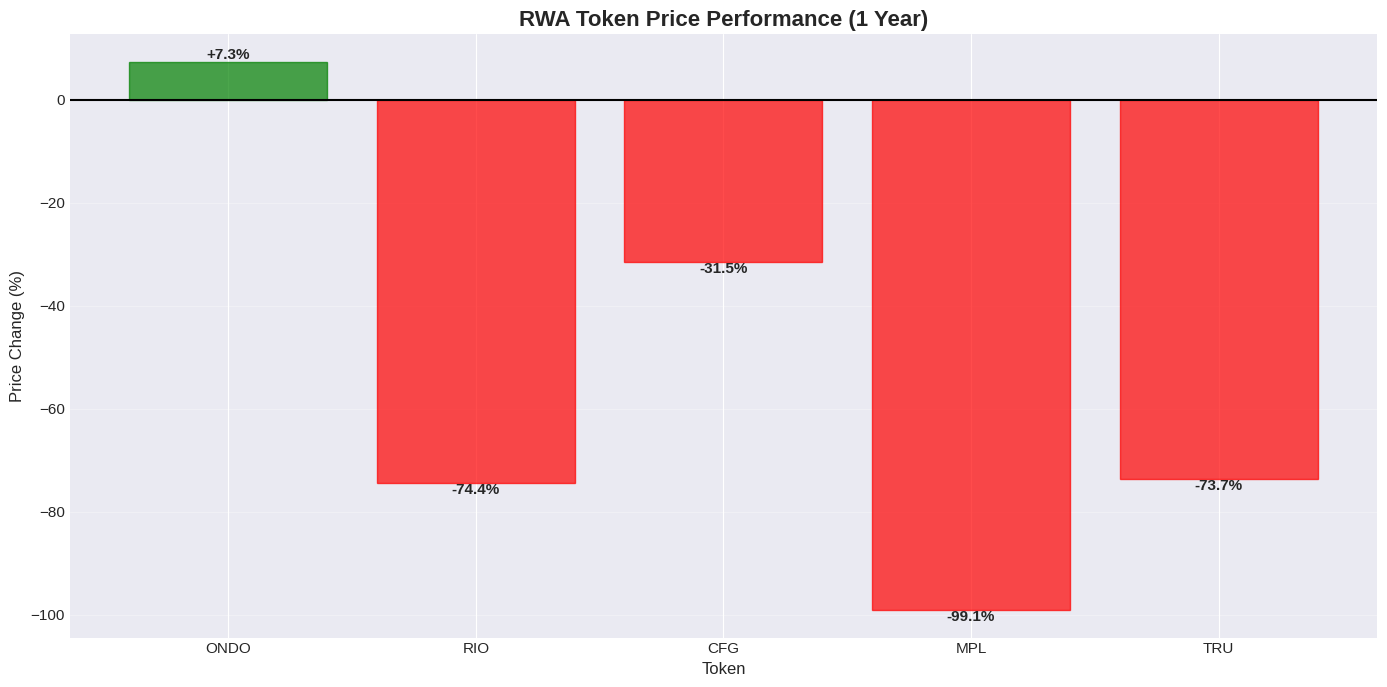

✅ Chart 1: RWA token price performance


In [18]:
fig, ax = plt.subplots(figsize=(14, 7))

# Plot 1-year performance
colors = plt.cm.Set3(range(len(df_rwa)))
bars = ax.bar(df_rwa['symbol'], df_rwa['price_change_1y'], color=colors, alpha=0.7, edgecolor='black')

# Color by positive/negative
for i, bar in enumerate(bars):
    if df_rwa.iloc[i]['price_change_1y'] > 0:
        bar.set_color('green')
        bar.set_alpha(0.7)
    else:
        bar.set_color('red')
        bar.set_alpha(0.7)

# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:+.1f}%',
            ha='center', va='bottom' if height > 0 else 'top', fontsize=11, fontweight='bold')

ax.axhline(y=0, color='black', linestyle='-', linewidth=1.5)
ax.set_title('RWA Token Price Performance (1 Year)', fontsize=16, fontweight='bold')
ax.set_xlabel('Token', fontsize=12)
ax.set_ylabel('Price Change (%)', fontsize=12)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("✅ Chart 1: RWA token price performance")

### Chart 2: Market Cap Comparison

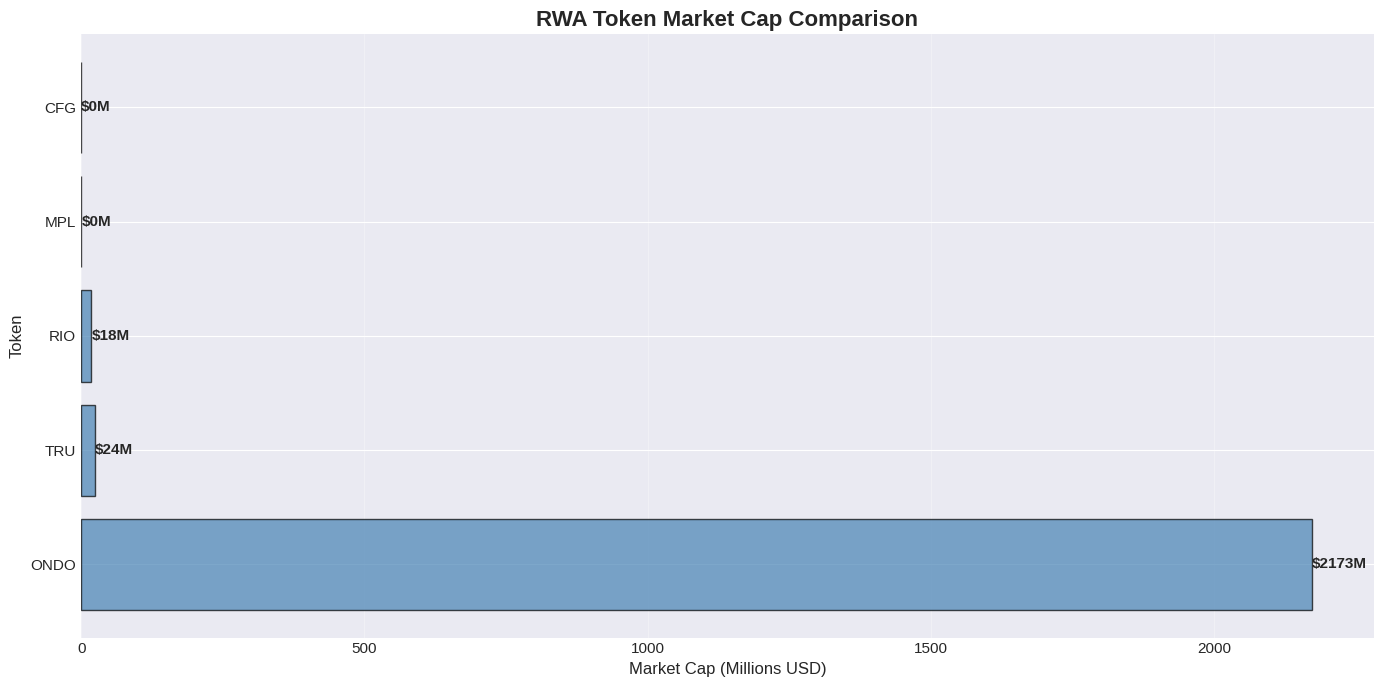

✅ Chart 2: Market cap comparison


In [19]:
fig, ax = plt.subplots(figsize=(14, 7))

# Sort by market cap
df_sorted = df_rwa.sort_values('market_cap', ascending=False)

bars = ax.barh(df_sorted['symbol'], df_sorted['market_cap'] / 1e6, color='steelblue', alpha=0.7, edgecolor='black')

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2.,
            f'${width:.0f}M',
            ha='left', va='center', fontsize=11, fontweight='bold')

ax.set_title('RWA Token Market Cap Comparison', fontsize=16, fontweight='bold')
ax.set_xlabel('Market Cap (Millions USD)', fontsize=12)
ax.set_ylabel('Token', fontsize=12)
ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("✅ Chart 2: Market cap comparison")

### Chart 3: Trading Volume Trends (Liquidity)

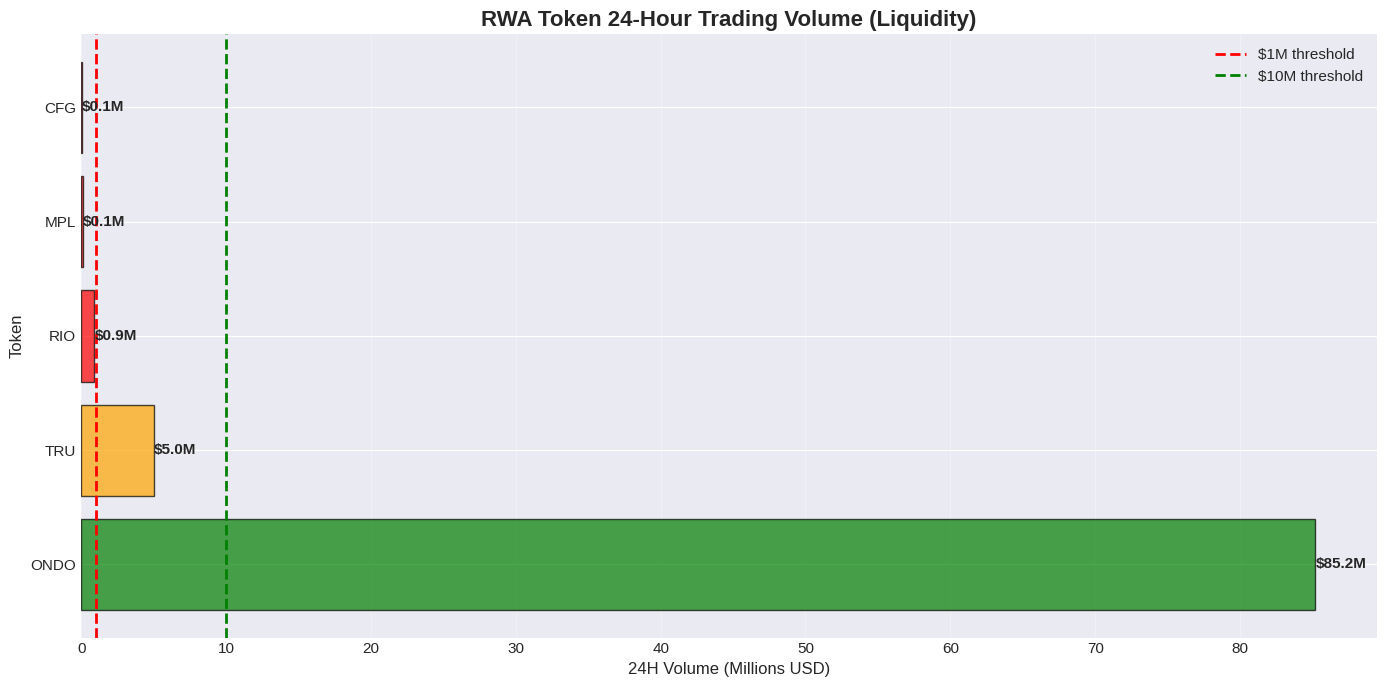

✅ Chart 3: Trading volume and liquidity


In [20]:
fig, ax = plt.subplots(figsize=(14, 7))

# Sort by volume
df_sorted = df_rwa.sort_values('total_volume_24h', ascending=False)

# Color by liquidity category
color_map = {'High': 'green', 'Medium': 'orange', 'Low': 'red'}
colors = [color_map[cat] for cat in df_sorted['liquidity_category']]

bars = ax.barh(df_sorted['symbol'], df_sorted['total_volume_24h'] / 1e6, color=colors, alpha=0.7, edgecolor='black')

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2.,
            f'${width:.1f}M',
            ha='left', va='center', fontsize=11, fontweight='bold')

# Add liquidity threshold line
ax.axvline(x=1, color='red', linestyle='--', linewidth=2, label='$1M threshold')
ax.axvline(x=10, color='green', linestyle='--', linewidth=2, label='$10M threshold')

ax.set_title('RWA Token 24-Hour Trading Volume (Liquidity)', fontsize=16, fontweight='bold')
ax.set_xlabel('24H Volume (Millions USD)', fontsize=12)
ax.set_ylabel('Token', fontsize=12)
ax.legend(loc='best')
ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("✅ Chart 3: Trading volume and liquidity")

### Chart 4: MC/TVL Ratio (Valuation Metric)

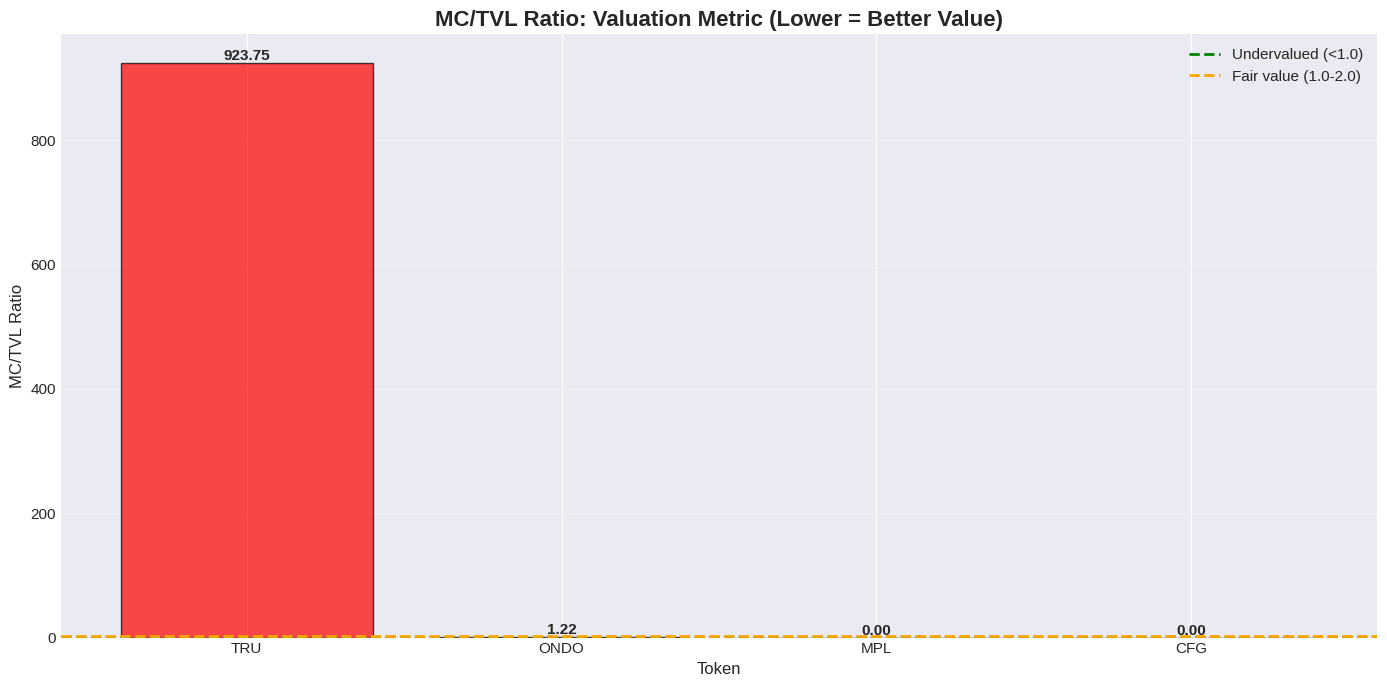

✅ Chart 4: MC/TVL valuation metric


In [21]:
# Filter tokens with TVL
df_with_tvl = df_rwa[df_rwa['current_tvl'] > 0].copy()

if len(df_with_tvl) > 0:
    fig, ax = plt.subplots(figsize=(14, 7))
    
    # Sort by MC/TVL
    df_sorted = df_with_tvl.sort_values('mc_tvl_ratio', ascending=False)
    
    # Color by valuation category
    color_map = {'Undervalued': 'green', 'Fair': 'orange', 'Expensive': 'red'}
    colors = [color_map[cat] for cat in df_sorted['valuation_category']]
    
    bars = ax.bar(df_sorted['symbol'], df_sorted['mc_tvl_ratio'], color=colors, alpha=0.7, edgecolor='black')
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    # Add threshold lines
    ax.axhline(y=1.0, color='green', linestyle='--', linewidth=2, label='Undervalued (<1.0)')
    ax.axhline(y=2.0, color='orange', linestyle='--', linewidth=2, label='Fair value (1.0-2.0)')
    
    ax.set_title('MC/TVL Ratio: Valuation Metric (Lower = Better Value)', fontsize=16, fontweight='bold')
    ax.set_xlabel('Token', fontsize=12)
    ax.set_ylabel('MC/TVL Ratio', fontsize=12)
    ax.legend(loc='best')
    ax.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Chart 4: MC/TVL valuation metric")
else:
    print("⚠️  No tokens with TVL data available for MC/TVL chart")

### Chart 5: Liquidity Score (Volume/Market Cap %)

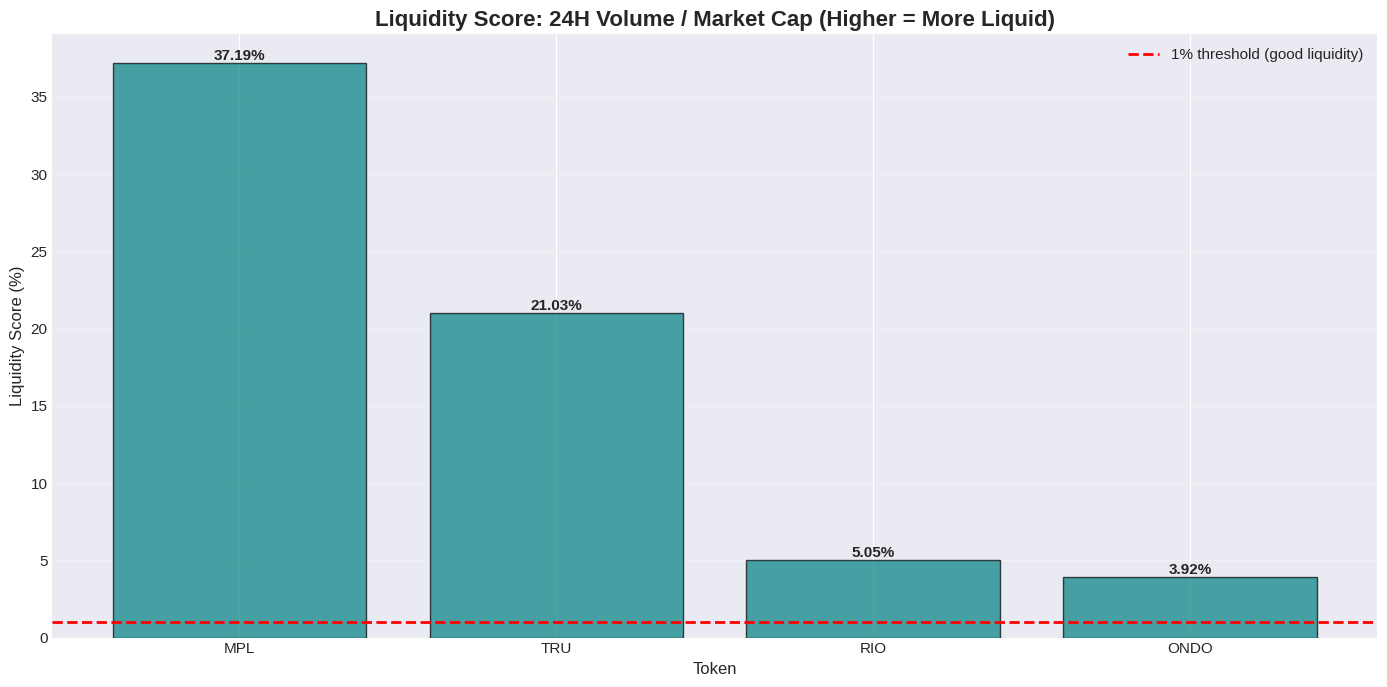

✅ Chart 5: Liquidity score analysis


In [22]:
fig, ax = plt.subplots(figsize=(14, 7))

# Sort by liquidity score
df_sorted = df_rwa.sort_values('liquidity_score', ascending=False)

bars = ax.bar(df_sorted['symbol'], df_sorted['liquidity_score'], color='teal', alpha=0.7, edgecolor='black')

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}%',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

# Add threshold line (>1% is good liquidity)
ax.axhline(y=1.0, color='red', linestyle='--', linewidth=2, label='1% threshold (good liquidity)')

ax.set_title('Liquidity Score: 24H Volume / Market Cap (Higher = More Liquid)', fontsize=16, fontweight='bold')
ax.set_xlabel('Token', fontsize=12)
ax.set_ylabel('Liquidity Score (%)', fontsize=12)
ax.legend(loc='best')
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("✅ Chart 5: Liquidity score analysis")

### Chart 6: Investment Score Summary

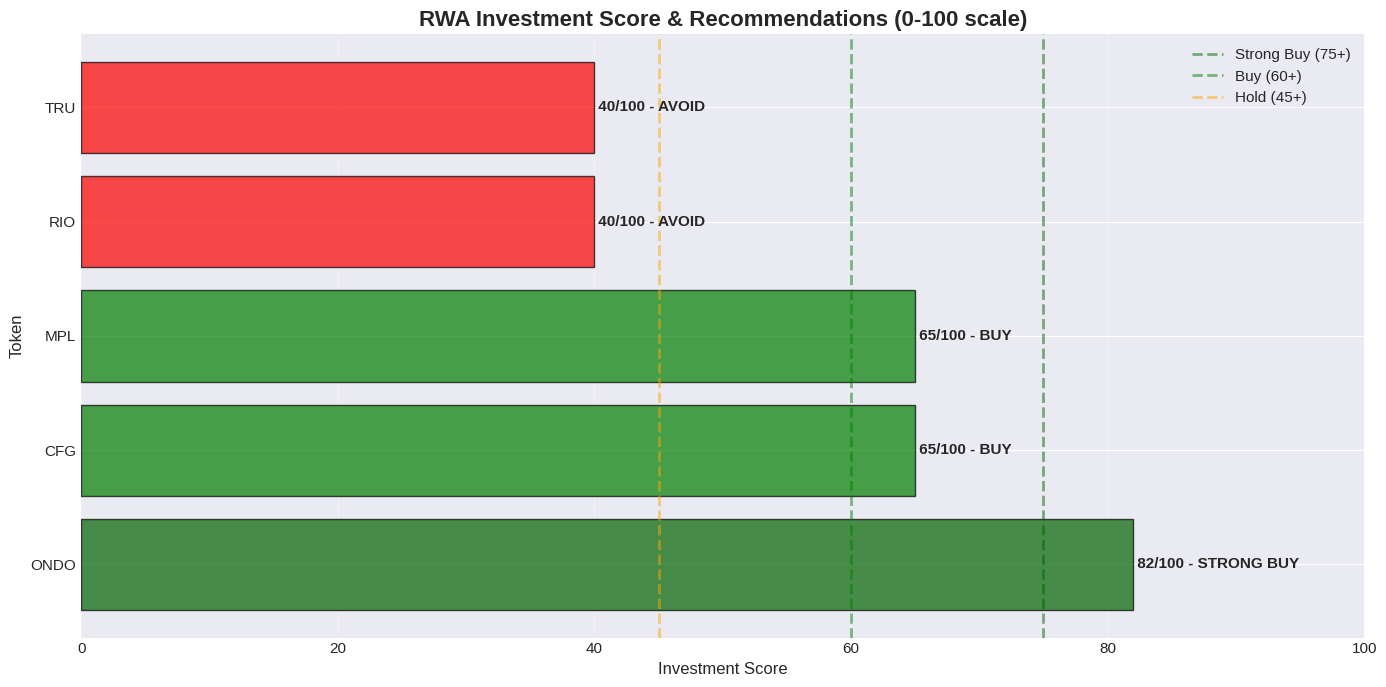

✅ Chart 6: Investment score and recommendations


In [23]:
fig, ax = plt.subplots(figsize=(14, 7))

# Sort by investment score
df_sorted = df_rwa_sorted.copy()

# Color by recommendation
color_map = {'STRONG BUY': 'darkgreen', 'BUY': 'green', 'HOLD': 'orange', 'AVOID': 'red'}
colors = [color_map[rec] for rec in df_sorted['recommendation']]

bars = ax.barh(df_sorted['symbol'], df_sorted['investment_score'], color=colors, alpha=0.7, edgecolor='black')

# Add value labels with recommendation
for i, bar in enumerate(bars):
    width = bar.get_width()
    rec = df_sorted.iloc[i]['recommendation']
    ax.text(width, bar.get_y() + bar.get_height()/2.,
            f' {width}/100 - {rec}',
            ha='left', va='center', fontsize=11, fontweight='bold')

# Add threshold lines
ax.axvline(x=75, color='darkgreen', linestyle='--', linewidth=2, alpha=0.5, label='Strong Buy (75+)')
ax.axvline(x=60, color='green', linestyle='--', linewidth=2, alpha=0.5, label='Buy (60+)')
ax.axvline(x=45, color='orange', linestyle='--', linewidth=2, alpha=0.5, label='Hold (45+)')

ax.set_title('RWA Investment Score & Recommendations (0-100 scale)', fontsize=16, fontweight='bold')
ax.set_xlabel('Investment Score', fontsize=12)
ax.set_ylabel('Token', fontsize=12)
ax.set_xlim(0, 100)
ax.legend(loc='best')
ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("✅ Chart 6: Investment score and recommendations")

## 8. Deep Dive: Top RWA Pick

In [24]:
# Select top-scoring token
top_pick = df_rwa_sorted.iloc[0]

print("\n" + "="*80)
print(f"🏆 TOP RWA PICK: {top_pick['name']} ({top_pick['symbol']})")
print("="*80)

print(f"\n📊 OVERVIEW:")
print(f"   Asset Type: {top_pick['asset_type']}")
print(f"   Current Price: ${top_pick['current_price']:.4f}")
print(f"   Market Cap: ${top_pick['market_cap']:,.0f}")
print(f"   Investment Score: {top_pick['investment_score']}/100")
print(f"   Recommendation: {top_pick['recommendation']}")

print(f"\n💰 LIQUIDITY:")
print(f"   24H Volume: ${top_pick['total_volume_24h']:,.0f}")
print(f"   Liquidity Score: {top_pick['liquidity_score']:.2f}%")
print(f"   Category: {top_pick['liquidity_category']}")

if top_pick['current_tvl'] > 0:
    print(f"\n📈 VALUATION:")
    print(f"   TVL: ${top_pick['current_tvl']:,.0f}")
    print(f"   MC/TVL Ratio: {top_pick['mc_tvl_ratio']:.2f}")
    print(f"   Valuation: {top_pick['valuation_category']}")
    print(f"   TVL Growth (90d): {top_pick['tvl_change_90d']:+.1f}%")

print(f"\n📊 PERFORMANCE:")
print(f"   24H: {top_pick['price_change_24h']:+.2f}%")
print(f"   7D: {top_pick['price_change_7d']:+.2f}%")
print(f"   30D: {top_pick['price_change_30d']:+.2f}%")
print(f"   1Y: {top_pick['price_change_1y']:+.2f}%")

print(f"\n🎯 UPSIDE POTENTIAL:")
print(f"   All-Time High: ${top_pick['ath']:.4f}")
print(f"   Current Distance from ATH: {top_pick['distance_from_ath']:.1f}%")
print(f"   Potential Upside to ATH: {abs(top_pick['distance_from_ath']):.1f}%")

print(f"\n💡 INVESTMENT THESIS:")
if top_pick['liquidity_category'] == 'High':
    print(f"   ✅ Excellent liquidity (>${top_pick['total_volume_24h']/1e6:.0f}M daily volume)")
elif top_pick['liquidity_category'] == 'Medium':
    print(f"   ✅ Adequate liquidity for most trades")

if not pd.isna(top_pick['mc_tvl_ratio']):
    if top_pick['valuation_category'] == 'Undervalued':
        print(f"   ✅ Undervalued (MC/TVL < 1.0)")
    elif top_pick['valuation_category'] == 'Fair':
        print(f"   ✅ Fairly valued (MC/TVL 1.0-2.0)")

if top_pick['tvl_change_90d'] > 0:
    print(f"   ✅ Growing protocol (TVL +{top_pick['tvl_change_90d']:.1f}% in 90 days)")

if top_pick['distance_from_ath'] < -50:
    print(f"   ✅ Strong recovery potential ({abs(top_pick['distance_from_ath']):.0f}% below ATH)")

print(f"\n⚠️  RISKS:")
print(f"   • Regulatory risk: RWA tokens face ongoing regulatory scrutiny")
print(f"   • Liquidity risk: Lower liquidity than major crypto assets")
print(f"   • Market risk: Correlated with both crypto and tradfi markets")
if top_pick['current_tvl'] > 0:
    print(f"   • Smart contract risk: Protocol depends on code security")

print("\n" + "="*80)
print("✅ Analysis complete! Notebook 3d finished.")
print("="*80)


🏆 TOP RWA PICK: Ondo (ONDO)

📊 OVERVIEW:
   Asset Type: US Treasuries
   Current Price: $0.6878
   Market Cap: $2,172,795,041
   Investment Score: 82/100
   Recommendation: STRONG BUY

💰 LIQUIDITY:
   24H Volume: $85,191,531
   Liquidity Score: 3.92%
   Category: High

📈 VALUATION:
   TVL: $1,784,553,955
   MC/TVL Ratio: 1.22
   Valuation: Fair
   TVL Growth (90d): +28.8%

📊 PERFORMANCE:
   24H: -1.64%
   7D: -8.81%
   30D: -27.76%
   1Y: +7.35%

🎯 UPSIDE POTENTIAL:
   All-Time High: $2.1400
   Current Distance from ATH: -67.9%
   Potential Upside to ATH: 67.9%

💡 INVESTMENT THESIS:
   ✅ Excellent liquidity (>$85M daily volume)
   ✅ Fairly valued (MC/TVL 1.0-2.0)
   ✅ Growing protocol (TVL +28.8% in 90 days)
   ✅ Strong recovery potential (68% below ATH)

⚠️  RISKS:
   • Regulatory risk: RWA tokens face ongoing regulatory scrutiny
   • Liquidity risk: Lower liquidity than major crypto assets
   • Market risk: Correlated with both crypto and tradfi markets
   • Smart contract risk: Pro

---

## Summary

This notebook analyzed **Real-World Asset (RWA) tokenization projects** and evaluated them for trading viability, as required by planning.pdf.

**What we learned:**
1. How to identify and categorize RWA tokens (treasuries, gold, real estate, credit)
2. How to evaluate liquidity using volume metrics
3. How to calculate valuation metrics (MC/TVL ratio)
4. How to assess growth trends using TVL data
5. How to create a comprehensive investment scoring system
6. How to generate actionable buy/sell recommendations

**Key Takeaways:**
- RWA sector represents $16T+ opportunity bringing tradfi yields on-chain
- Liquidity is critical: Look for >$1M daily volume
- MC/TVL ratio helps identify undervalued protocols
- Growing TVL indicates product-market fit
- Always consider regulatory risk for RWA tokens

**Top Picks:** See investment score ranking above for best opportunities.

---